In [1]:
#Import Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import time
import math
from sklearn import metrics

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train = pd.get_dummies(data=train, columns=['Sex'])
test = pd.get_dummies(data=test, columns=['Sex'])


In [4]:
#Fill Embarked NA and convert object to strings
train['Embarked'].fillna('S', inplace = True)
train = pd.get_dummies(data=train, columns=['Embarked'])

#Fill Embarked NA and convert object to strings
test['Embarked'].fillna('S', inplace = True)
test = pd.get_dummies(data=test, columns=['Embarked'])

In [5]:
def get_title(title):
    start = title.find(', ', 0) + 2
    end = title.find('.', start)
    return(title[start:end])
    
train['Title']=train['Name'].map(lambda x: get_title(x))
test['Title']=test['Name'].map(lambda x: get_title(x))

In [6]:
#Create Feature engineering, title based on Name
def rebucket_title(title):
#    title = str(title)
    if title == 'Don':
        title = 'Mr'
    elif title == 'Rev':
        title = 'Mr'
    elif title == 'Dr':
        title = 'Mr'
    elif title == 'Mme':
        title = 'Miss'
    elif title == 'Major':
        title = 'Crew'
    elif title == 'Lady':
        title = 'Mrs'
    elif title == 'Sir':
        title = 'Mr'
    elif title == 'Mlle':
        title = 'Miss'
    elif title == 'Col':
        title = 'Crew'
    elif title == 'Capt':
        title = 'Crew'
    elif title == 'the Countess':
        title = 'Mrs'
    elif title == 'Jonkheer':
        title = 'Mrs'
    elif title == 'Dona':
        title = 'Mrs'
    elif title == 'Ms':
        title = 'Mrs'
    return (title)

train['Title'] = train['Title'].apply(lambda x: rebucket_title(x))
test['Title'] = test['Title'].apply(lambda x: rebucket_title(x))

In [7]:
train = pd.get_dummies(data = train, columns = ['Title'])
test = pd.get_dummies(data = test, columns = ['Title'])

In [8]:

#del train['Embarked']
#train['Embarked'] = col_as_string

#Fill Age NA
train['Age'].fillna(18, inplace = True)

#del train['Embarked']
#train['Embarked'] = col_as_string

#Fill Age NA
test['Age'].fillna(18, inplace = True)

#plot_columns = ['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']

#plot_columns = ['Survived', 'Sex_female', 'Sex_male', 'Pclass', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', ]
#test_columns = ['Sex_female', 'Sex_male', 'Pclass', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', ]
drop_columns = ['PassengerId', 'SibSp', 'Name', 'Parch', 'Ticket', 'Cabin']

train_data = train.drop(columns = drop_columns)
test_data = test.drop(columns = drop_columns)

In [9]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22.0,7.2500,0,1,0,0,1,0,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0,0,0,0,1
2,1,3,26.0,7.9250,1,0,0,0,1,0,0,1,0,0
3,1,1,35.0,53.1000,1,0,0,0,1,0,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1,0,0,0,1,0
5,0,3,18.0,8.4583,0,1,0,1,0,0,0,0,1,0
6,0,1,54.0,51.8625,0,1,0,0,1,0,0,0,1,0
7,0,3,2.0,21.0750,0,1,0,0,1,0,1,0,0,0
8,1,3,27.0,11.1333,1,0,0,0,1,0,0,0,0,1
9,1,2,14.0,30.0708,1,0,1,0,0,0,0,0,0,1


In [10]:
#Split train and test
train_data = train_data.as_matrix()
test_data = test_data.as_matrix()
X_train = train_data[100:,1:]
y_train = train_data[100:,:1]
y_train = np.reshape(y_train,-1)
X_val = train_data[:100,1:]
y_val = train_data[:100,:1]
y_val = np.reshape(y_val,-1)
X_test = test_data

/home/jun_inthebay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/jun_inthebay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
X_train.shape

(791, 13)

In [12]:
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Crew,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,0,1,0,0,1,0,0,0,1,0
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,1,0,0,1,0,0,0,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,0,1,0,0,1,0,0,0,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,1,0,1,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,0,1,0,0,1,0,0,0,1,0


In [13]:
test_data

array([[ 3.    , 34.5   ,  7.8292, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  7.    , ...,  0.    ,  0.    ,  1.    ],
       [ 2.    , 62.    ,  9.6875, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    , 38.5   ,  7.25  , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 18.    ,  8.05  , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 18.    , 22.3583, ...,  0.    ,  0.    ,  0.    ]])

Training
Iteration 0: with minibatch training loss = 3.94 and accuracy of 0.72
Epoch 1, Overall loss = 7.81 and accuracy of 0.619
Epoch 2, Overall loss = 5.91 and accuracy of 0.619
Epoch 3, Overall loss = 4.02 and accuracy of 0.619
Epoch 4, Overall loss = 2.4 and accuracy of 0.619
Epoch 5, Overall loss = 1.33 and accuracy of 0.642
Epoch 6, Overall loss = 0.891 and accuracy of 0.666
Epoch 7, Overall loss = 0.804 and accuracy of 0.679
Epoch 8, Overall loss = 0.762 and accuracy of 0.68
Epoch 9, Overall loss = 0.732 and accuracy of 0.674
Epoch 10, Overall loss = 0.71 and accuracy of 0.671
Epoch 11, Overall loss = 0.693 and accuracy of 0.675
Epoch 12, Overall loss = 0.681 and accuracy of 0.675
Iteration 100: with minibatch training loss = 0.768 and accuracy of 0.65
Epoch 13, Overall loss = 0.673 and accuracy of 0.679
Epoch 14, Overall loss = 0.667 and accuracy of 0.675
Epoch 15, Overall loss = 0.664 and accuracy of 0.673
Epoch 16, Overall loss = 0.662 and accuracy of 0.676
Epoch 17, Overall

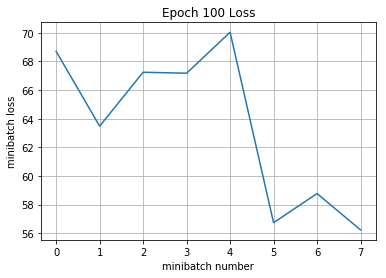

Validation
Epoch 1, Overall loss = 0.735 and accuracy of 0.58


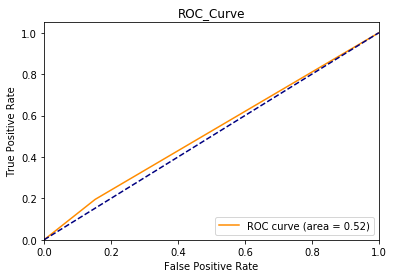

predicted_labels: 0.0


In [16]:
# Define Model Parameters
def run_model(session, predict, loss_val, Xd, yd,
              epochs=20, batch_size=124, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [cost_op,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in np.arange(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {x: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"
              .format(total_loss,total_correct,e+1))
        if plot_losses and (e == epochs-1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

#Define features and Labels shape
numFeatures = X_train.shape[1]
numLabels = 2

# clear old variables
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, numFeatures])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)
Lambda = 0.001 #Regularization Parameter
learningRate = 0.001
'''
learningRate = tf.train.exponential_decay(learning_rate=1e-2,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
'''
# Logistic Regression
def Titanicmodel(x,y,is_training):   
    weights=tf.get_variable("weights",shape=[numFeatures,numLabels])
    bias=tf.get_variable("bias",shape=[numLabels])
    y_out = tf.matmul(x,weights)+bias
    return(y_out,weights)
y_out,weights = Titanicmodel(x,y,is_training)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.one_hot(y,2),logits=y_out))
regularizer = tf.nn.l2_loss(weights)
cost_op = tf.reduce_mean(loss + Lambda * regularizer)
optimizer = tf.train.GradientDescentOptimizer(learningRate)
train_step = optimizer.minimize(cost_op)

#Prediction
prediction = tf.argmax(y_out,1)

#Lets strat a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Training')
run_model(sess,y_out,cost_op,X_train,y_train,100,100,100,train_step,True)
print('Validation')
run_model(sess,y_out,cost_op,X_val,y_val,1,100)

predicted_vallabels = np.zeros(X_val.shape[0])
for i in np.arange(0,X_val.shape[0]/50,dtype=np.int64):
    start = i*50
    end = (i+1)*50
    predicted_vallabels[start:end] = sess.run(prediction,feed_dict={x: X_val[start:end,:],y: predicted_vallabels[start:end],is_training: False})

    
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = metrics.roc_curve(y_val, predicted_vallabels)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve')
plt.legend(loc="lower right")
plt.show()

predicted_labels = np.zeros(X_test.shape[0])
for i in np.arange(0,X_test.shape[0]/50,dtype=np.int64):
    start = i*50
    end = (i+1)*50
    predicted_labels[start:end] = sess.run(prediction,feed_dict={x: X_test[start:end,:],y: predicted_labels[start:end],is_training: False})
    
print('predicted_labels:',predicted_labels[5])

PassengerId = test['PassengerId']

# save results
np.savetxt('submission.csv', 
           np.c_[PassengerId,predicted_labels], 
           delimiter=',', 
           header = 'PassengerId,Survived', 
           comments = '', 
           fmt='%d')

sess.close()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'